In [1]:
%matplotlib inline
import sys, os
import numpy

In [2]:
os.environ['PYOPENGL_PLATFORM'] = 'egl'
import yt
import yt_idv
#import widgyts

In [3]:
rc = yt_idv.render_context(engine='egl', gui=True, width=1200, height=1200)

In [4]:
grid = numpy.zeros( (64,64,64))
grid[31:34, 31:34, 31:34] = 0.5
grid[60:64, 31:34, 28:35] = 1.0
grid[0:4, 0:4, 0:32] = 0.25
grid[0:4, 0:32, 0:4] = 0.45
grid[0:32, 0:4, 0:4] = 0.85
datad = dict(Density=grid)

In [5]:
bbox = numpy.array( [ [0,1], [0,1], [0,1] ])
ds = yt.load_uniform_grid( datad, grid.shape, 1.0, bbox=bbox )

yt : [INFO     ] 2022-03-25 13:11:03,066 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-03-25 13:11:03,066 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2022-03-25 13:11:03,067 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-25 13:11:03,067 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-25 13:11:03,068 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2022-03-25 13:11:03,201 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 13:11:03,202 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 13:11:03,202 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 13:11:03,203 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-03-25 13:11:03,204 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



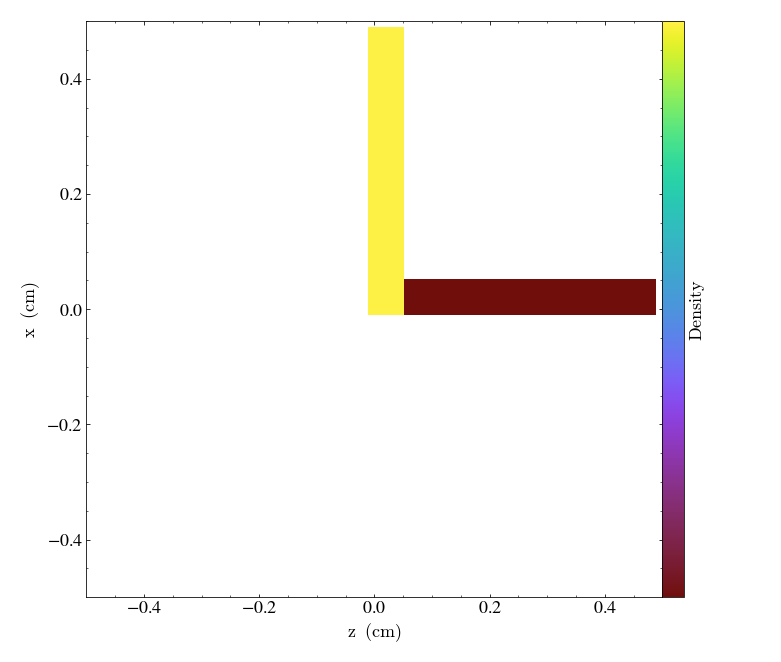

In [6]:
yt.SlicePlot(ds, 'y', 'Density', center=(.01,.01,.01))

yt : [INFO     ] 2022-03-25 13:11:03,561 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 13:11:03,561 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 13:11:03,562 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 13:11:03,563 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-03-25 13:11:03,563 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



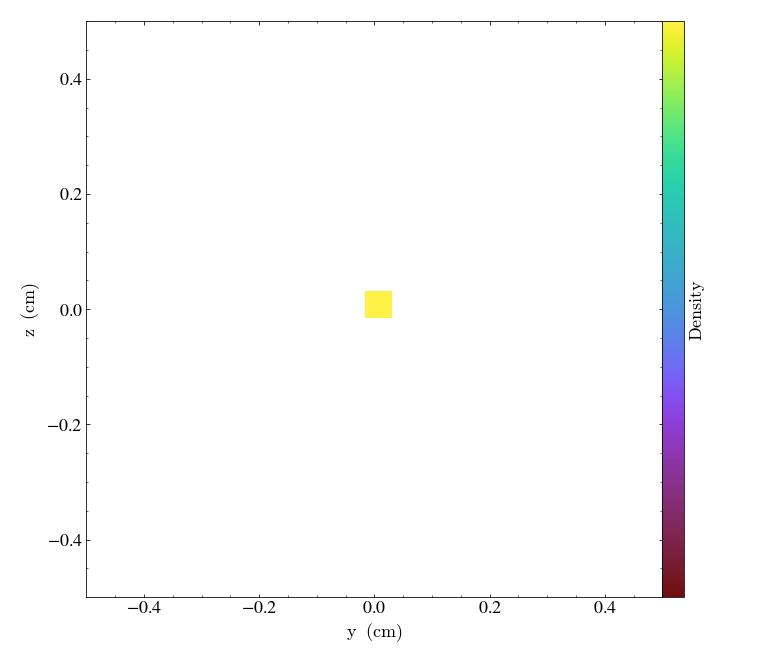

In [7]:
yt.SlicePlot(ds,'x','Density')

In [8]:
sg = rc.add_scene(ds, 'Density', no_ghost=True)

In [9]:
sg.components[0].cmap_log=False

In [10]:
im = rc.run()

introspect: n_uniforms =  -1
introspect: n_attrib =  -1
Computed new cmap values 4.470348358154297e-06 - 1.0
introspect: n_uniforms =  -1
introspect: n_attrib =  -1


In [11]:
import matplotlib.pyplot as mp



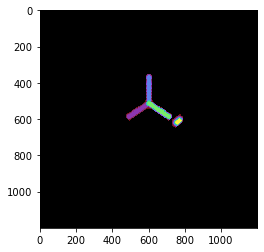

In [12]:
mp.imshow(im)

In [13]:
sg.components[0].cmap_log

False

In [30]:
rc.add_image()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [31]:
yt.__version__

'3.6.1'

In [15]:
sc = yt.create_scene(ds, lens_type='perspective', field='Density')
source = sc[0]
source.set_field('Density')
source.set_log(False)


<Volume Source>:YTRegion (UniformGridData): , center=[0.5 0.5 0.5] cm, left_edge=[0. 0. 0.] cm, right_edge=[1. 1. 1.] cm transfer_function:None

In [16]:
bounds = (0, 1)
tf = yt.ColorTransferFunction(bounds)
tf.add_gaussian( 0.25, width=.01, height=[1,0,0,1])
tf.add_gaussian( 0.45, width=.01, height=[0,1,0,1])
tf.add_gaussian( 0.85, width=.01, height=[0,0,1,1])
tf.add_gaussian( 0.5, width=.01, height=[.5,.5,.5,1])
tf.add_gaussian( 1.0, width=.01, height=[0,1,.6,.5])


In [17]:
import matplotlib.pyplot as mp

yt : [INFO     ] 2022-03-25 13:11:04,157 Rendering scene (Can take a while).
yt : [INFO     ] 2022-03-25 13:11:04,158 Creating volume
yt : [INFO     ] 2022-03-25 13:11:04,184 Creating transfer function
yt : [INFO     ] 2022-03-25 13:11:04,184 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


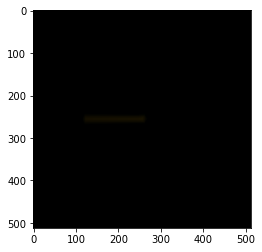

In [18]:
mp.imshow(sc.render())

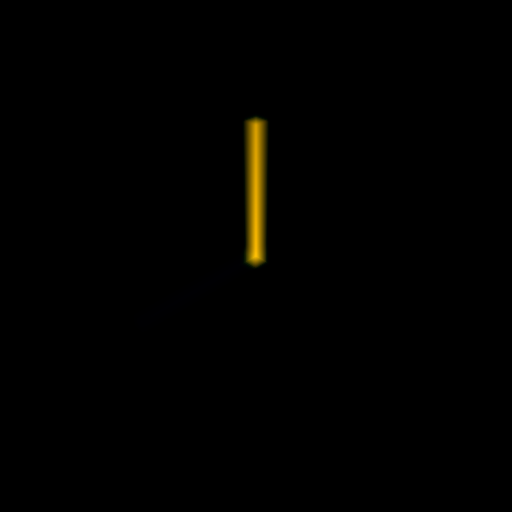

In [19]:
sc

In [20]:
sc.camera.lens

<Lens Object>:
	lens_type:perspective
	viewpoint:[0.0669873 0.0669873 0.0669873] code_length

In [21]:
sc.camera.lens.viewpoint

YTArray([0.0669873, 0.0669873, 0.0669873]) code_length

In [22]:
dir(sc.camera.lens)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_distributed',
 '_finalize_parallel',
 '_get_grid_objs',
 '_get_grids',
 '_get_objs',
 '_get_sampler_params',
 '_grids',
 '_initialize_parallel',
 'back_center',
 'box_vectors',
 'comm',
 'current_image',
 'front_center',
 'get_dependencies',
 'new_image',
 'num_threads',
 'origin',
 'partition_index_2d',
 'partition_index_3d',
 'partition_index_3d_bisection_list',
 'partition_region_3d',
 'project_to_plane',
 'sampler',
 'set_camera',
 'set_viewpoint',
 'setup_box_properties',
 'sub_samples',
 'viewpoint']

In [23]:
sc.camera.lens.set_viewpoint( [1,1,.5])

yt : [INFO     ] 2022-03-25 13:11:05,696 Rendering scene (Can take a while).


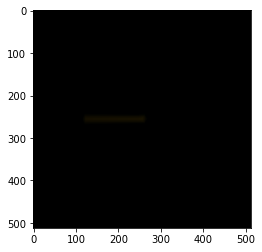

In [24]:
mp.imshow(sc.render())

In [25]:
sc.render()

yt : [INFO     ] 2022-03-25 13:11:07,019 Rendering scene (Can take a while).


ImageArray([[[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            ...,

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0.

In [26]:
import yt.visualization.volume_rendering as vr

In [27]:
vs = vr.render_source.VolumeSource( ds, field='Density')

In [28]:
vs

<Volume Source>:YTRegion (UniformGridData): , center=[0.5 0.5 0.5] cm, left_edge=[0. 0. 0.] cm, right_edge=[1. 1. 1.] cm transfer_function:None

In [29]:
help(vs.tfh)

Help on TransferFunctionHelper in module yt.visualization.volume_rendering.transfer_function_helper object:

class TransferFunctionHelper(builtins.object)
 |  TransferFunctionHelper(ds)
 |  
 |  A transfer function helper.
 |  
 |  This attempts to help set up a good transfer function by finding
 |  bounds, handling linear/log options, and displaying the transfer
 |  function combined with 1D profiles of rendering quantity.
 |  
 |  Parameters
 |  ----------
 |  ds: A Dataset instance
 |      A static output that is currently being rendered. This is used to
 |      help set up data bounds.
 |  
 |  Notes
 |  -----
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  build_transfer_function(self)
 |      Builds the transfer function according to the current state of the
 |      TransferFunctionHelper.
 |      
 |      Parameters
 |      ----------
 |      None
 |      
 |      Returns
 |      -------
 